#RED NEURONAL

/content/DeepNeuralNetworkUSS/Projects/Credit
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


513/513 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6872 - loss: 0.6991 - val_accuracy: 0.7340 - val_loss: 0.5989
Epoch 2/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7364 - loss: 0.5889 - val_accuracy: 0.7373 - val_loss: 0.5802
Epoch 3/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7411 - loss: 0.5688 - val_accuracy: 0.7345 - val_loss: 0.5641
Epoch 4/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7422 - loss: 0.5613 - val_accuracy: 0.7426 - val_loss: 0.5533
Epoch 5/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7457 - loss: 0.5501 - val_accuracy: 0.7445 - val_loss: 0.5460
Epoch 6/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7501 - loss: 0.5415 - val_accuracy: 0.7471 - val_loss: 0.5449
Epoch 7/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7456 - loss: 0.5464 - val_accuracy: 0.7298 - val_loss: 0.5508
Epoch 8/20
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7487 - loss: 0.5390 - val_accuracy: 0.7418 - val_

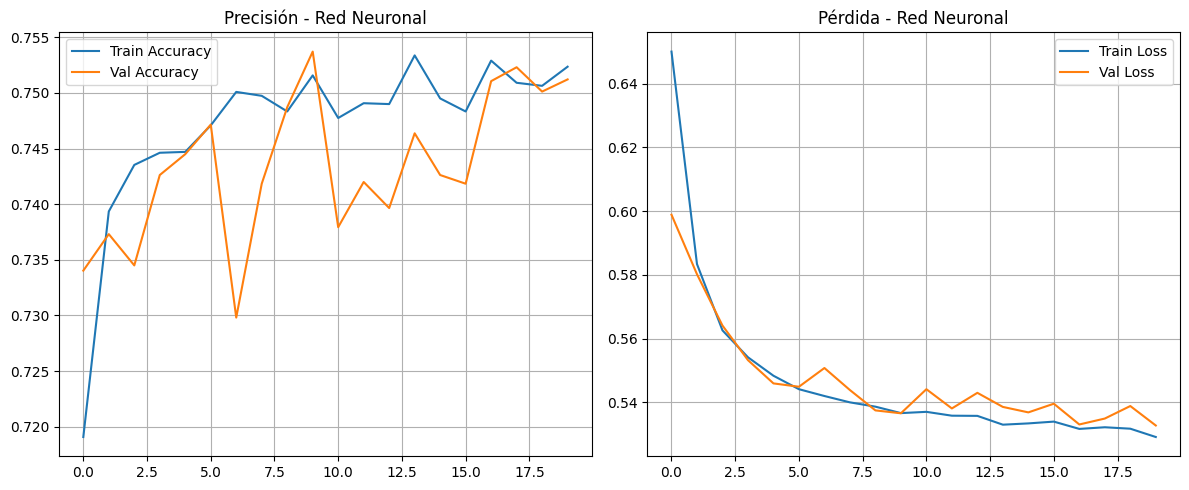

In [9]:
### 🔧 TAREA
#Antes de entrenar la red neuronal, modifica los hiperparámetros en `config.yaml`, especialmente:
#- `hidden_layers`: cambia el número de capas o neuronas.
#- `activation`: prueba funciones como `tanh` o `elu`.
#- `epochs`: aumenta o reduce el número de épocas.
#
#Luego, vuelve a ejecutar este notebook y observa cómo cambia el rendimiento.

import os
print(os.getcwd())

import sys
sys.path.append("../src")

import train
import model
import utils
import evaluate as ev
import pandas as pd
import numpy as np
import yaml

# 🔧 Cargar configuración
config = train.load_config("/content/DeepNeuralNetworkUSS/Projects/Credit/config.yaml")

# 📦 Cargar y preparar los datos
X, y = train.load_data("/content/DeepNeuralNetworkUSS/Projects/Credit/data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

# 🧠 Construir el modelo
input_dim = X_train.shape[1]
nn_model = model.build_model(config, input_dim)

# 🚀 Entrenar el modelo
history = train.train_model(nn_model, X_train, y_train, config)

# 💾 Guardar modelo entrenado
utils.save_model(nn_model, path="/content/DeepNeuralNetworkUSS/Projects/Credit/models/nn_model.keras")

# 📈 Visualizar evolución del entrenamiento
utils.plot_training_history(history, model_name="Red Neuronal")

### 📊 Pregunta de reflexión
# ¿Ves signos de sobreajuste en las curvas de pérdida o precisión?
#No se observan signos claros de sobreajuste en ninguna de las dos configuraciones. Las curvas de entrenamiento y validación siguen trayectorias similares tanto en precisión como en pérdida. Aunque en la versión modificada hay más fluctuaciones, no hay una divergencia marcada entre entrenamiento y validación que indique sobreajuste.

# ¿Cuál fue la época donde la validación alcanzó su mejor punto?
#En ambas configuraciones, la validación parece estabilizarse y alcanzar su mejor punto cerca de la época 18, justo antes de finalizar el entrenamiento. Esto sugiere que el modelo converge adecuadamente dentro del rango de épocas definido.

# ¿Qué pasaría si entrenaras con más (o menos) datos?
#Con más datos: Probablemente se reducirían las fluctuaciones en las curvas, especialmente en la validación. Esto ayudaría a mejorar la capacidad de generalización del modelo y a obtener resultados más estables.
#Con menos datos: Es probable que aumenten las fluctuaciones y se reduzca la capacidad del modelo para aprender patrones generales. Esto podría llevar a un mayor riesgo de sobreajuste o incluso subentrenamiento, dependiendo de cuán reducido sea el conjunto de datos.
